# Random Forest

- Random Forest is an ensemble learning algorithm that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting. It is commonly used for classification and regression tasks.

## Step 1: Import Required Libraries



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE  # Install using: pip install imbalanced-learn


#### Imports all required libraries for data processing, visualization, and machine learning.
#### imblearn (SMOTE) is used to handle class imbalance.

## Step 2: Load Dataset

In [3]:
# Load dataset (for CSV file)
file_path = "BigfraudTest.csv"  # Ensure the file is in the working directory
df = pd.read_csv(file_path)

# Display basic dataset information
print("Dataset Shape:", df.shape)
print("Missing Values:", df.isnull().sum().sum())
print("First 5 rows of dataset:")
df.head()


Dataset Shape: (50676, 23)
Missing Values: 0
First 5 rows of dataset:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.526826e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


#### Loads the dataset from a CSV file.
#### Prints the shape (rows, columns) and checks for missing values.

## Step 3: Drop Unnecessary Columns

In [4]:
# Drop columns that are not useful for fraud detection
drop_columns = ["Unnamed: 0", "first", "last", "street", "trans_num"]
df = df.drop(columns=drop_columns, errors="ignore")

# Confirm dataset after dropping columns
print("Dataset Shape after Dropping Columns:", df.shape)
df.head()


Dataset Shape after Dropping Columns: (50676, 18)


,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,6/21/2020 12:14,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,1371816865,33.986391,-81.200714,0
1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,1371816873,39.450498,-109.960431,0
2,6/21/2020 12:14,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,1371816893,40.495810,-74.196111,0
3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,7/25/1987,1371816915,28.812398,-80.883061,0
4,6/21/2020 12:15,3.526826e+15,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,7/6/1955,1371816917,44.959148,-85.884734,0


#### Removes unnecessary columns (IDs, names, transaction numbers) that do not help in fraud detection.

## Step 4: Convert Categorical Columns to Numerical

In [5]:
# Use Label Encoding for categorical variables
label_encoder = LabelEncoder()
categorical_cols = ["category", "state", "job", "gender"]

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert categorical data to numeric

# Check updated dataset
print("Dataset after Encoding Categorical Features:")
df.head()


Dataset after Encoding Categorical Features:


,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,6/21/2020 12:14,2.291164e+15,fraud_Kirlin and Sons,10,2.86,1,Columbia,39,29209,33.9659,-80.9355,333497,275,3/19/1968,1371816865,33.986391,-81.200714,0
1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,10,29.84,0,Altonah,43,84002,40.3207,-110.4360,302,391,1/17/1990,1371816873,39.450498,-109.960431,0
2,6/21/2020 12:14,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",5,41.28,0,Bellmore,33,11710,40.6729,-73.5365,34496,259,10/21/1970,1371816893,40.495810,-74.196111,0
3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,9,60.05,1,Titusville,8,32780,28.5697,-80.8191,54767,406,7/25/1987,1371816915,28.812398,-80.883061,0
4,6/21/2020 12:15,3.526826e+15,fraud_Johnston-Casper,13,3.19,1,Falmouth,21,49632,44.2529,-85.0170,1126,196,7/6/1955,1371816917,44.959148,-85.884734,0


#### Encodes categorical columns (like category, state, job, gender) into numerical values.
#### Prevents memory errors by using Label Encoding instead of One-Hot Encoding.

## Step 5: Process Date Columns

In [6]:
# Convert 'dob' to age and drop the original column
df["dob"] = pd.to_datetime(df["dob"], errors="coerce")
df["age"] = datetime.now().year - df["dob"].dt.year
df = df.drop(columns=["dob"])

# Convert 'trans_date_trans_time' and extract useful time-based features
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"], errors="coerce")
df["trans_hour"] = df["trans_date_trans_time"].dt.hour
df["trans_day"] = df["trans_date_trans_time"].dt.day
df["trans_month"] = df["trans_date_trans_time"].dt.month
df = df.drop(columns=["trans_date_trans_time"])

# Display dataset after processing dates
print("Dataset after Date Processing:")
df.head()


Dataset after Date Processing:


,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_hour,trans_day,trans_month
0,2.291164e+15,fraud_Kirlin and Sons,10,2.86,1,Columbia,39,29209,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0,57,12,21,6
1,3.573030e+15,fraud_Sporer-Keebler,10,29.84,0,Altonah,43,84002,40.3207,-110.4360,302,391,1371816873,39.450498,-109.960431,0,35,12,21,6
2,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",5,41.28,0,Bellmore,33,11710,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0,55,12,21,6
3,3.591920e+15,fraud_Haley Group,9,60.05,1,Titusville,8,32780,28.5697,-80.8191,54767,406,1371816915,28.812398,-80.883061,0,38,12,21,6
4,3.526826e+15,fraud_Johnston-Casper,13,3.19,1,Falmouth,21,49632,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0,70,12,21,6


#### Converts dob into age and removes the original column.
#### Extracts hour, day, and month from trans_date_trans_time to capture fraud patterns.

## Step 6: Define Features & Target Variable

In [7]:
# Separate features (X) and target (y)
X = df.drop(columns=["is_fraud"])  # Features
y = df["is_fraud"]  # Target variable

# Confirm the shapes
print("Feature Set Shape:", X.shape)
print("Target Set Shape:", y.shape)


Feature Set Shape: (50676, 19)
Target Set Shape: (50676,)


#### Defines features (X) and target (y) for model training.
#### is_fraud is the target variable (0 = Not Fraud, 1 = Fraud).

## Step 7: Split Data into Train & Test Sets

In [8]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm the split
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (40540, 19)
Testing Data Shape: (10136, 19)


#### Splits the dataset into 80% training and 20% testing.
#### stratify=y ensures the fraud percentage remains the same in both sets.

## Step 8: Handle Class Imbalance Using SMOTE

In [9]:
# Convert all columns to numeric (if any non-numeric data exists)
X_train = X_train.apply(pd.to_numeric, errors="coerce")  
X_test = X_test.apply(pd.to_numeric, errors="coerce")

# Drop columns with NaN values (if conversion caused any issues)
X_train = X_train.dropna(axis=1)
X_test = X_test.dropna(axis=1)

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify class distribution after SMOTE
print("Class Distribution After SMOTE:\n", y_train_smote.value_counts(normalize=True) * 100)


Class Distribution After SMOTE:
 is_fraud
0    66.667217
1    33.332783
Name: proportion, dtype: float64


#### Uses SMOTE to generate synthetic fraud cases and balance the dataset.
#### Ensures the model doesn’t ignore fraud transactions.

## Step 9: Feature Scaling (Standardization)



In [10]:
# Standardize only numeric columns
scaler = StandardScaler()
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

X_train_smote[numeric_cols] = scaler.fit_transform(X_train_smote[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Confirm standardization
print("Dataset after Standardization:")
X_train_smote.head()


Dataset after Standardization:


,cc_num,category,amt,gender,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,age,trans_hour,trans_day,trans_month
0,2.220944,-1.511076,-0.709254,1.233475,1.170634,1.098766,-1.085550,-0.595453,0.059766,0.790015,0.591885,-1.007813,-0.669002,38,21,2,7
1,-0.385159,1.483800,-0.706290,1.233475,1.313020,-0.893708,-0.053280,0.808140,-0.265682,-0.930167,-0.459547,0.035626,0.757948,50,17,27,6
2,-0.383944,0.394754,-0.709764,-0.810718,-1.748277,-0.378350,-1.166334,0.181907,-0.299005,0.287661,0.332899,-1.025687,0.180133,54,15,1,7
3,-0.385488,1.483800,-0.221499,-0.810718,0.672284,0.998394,-0.713886,-0.724679,-0.301060,-1.638029,0.782351,-0.799363,-0.778320,55,20,3,7
4,-0.387764,-0.422030,-0.578398,-0.810718,-0.751575,0.773718,0.011994,-0.767171,-0.301942,-0.382144,1.355253,0.179196,-0.812666,64,16,6,7


#### Scales numerical values to prevent bias due to large numbers (e.g., transaction amount).

## Step 10: Train Random Forest Model

In [11]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Model training completed
print("✅ Random Forest Model Trained Successfully!")


✅ Random Forest Model Trained Successfully!


#### Trains a Random Forest Classifier to detect fraud.

## Step 11: Model Predictions

In [12]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Check sample predictions
print("Sample Predictions:", y_pred[:10])


Sample Predictions: [0 0 0 0 0 0 0 0 0 0]


#### Uses the trained Random Forest model to predict fraud (1) or non-fraud (0) on the test dataset.
#### Prints the first 10 predictions to verify output.



## Step 12: Model Evaluation


In [13]:
# Print evaluation metrics
print("🔹 Accuracy Score:", accuracy_score(y_test, y_pred))
print("🔹 ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))


🔹 Accuracy Score: 0.9989147592738753
🔹 ROC-AUC Score: 0.9984015946909668
🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10096
           1       0.91      0.80      0.85        40

    accuracy                           1.00     10136
   macro avg       0.96      0.90      0.93     10136
weighted avg       1.00      1.00      1.00     10136



#### Evaluates model performance using key metrics:

- Accuracy Score → Measures the percentage of correct predictions.
- ROC-AUC Score → Shows how well the model distinguishes fraud from non-fraud.
- Classification Report → Provides precision, recall, and F1-score for each class.


## Step 13: Visualize Confusion Matrix

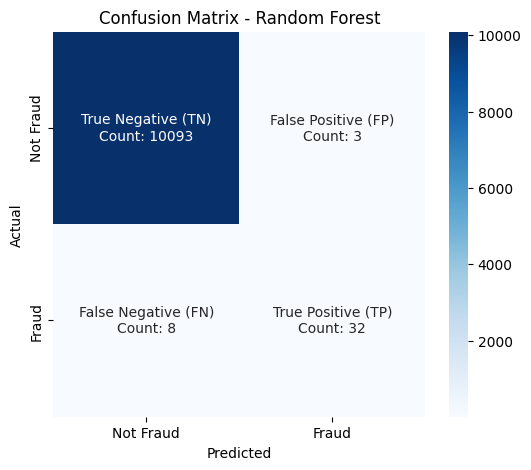

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define labels for each cell
group_labels = np.array([["True Negative (TN)", "False Positive (FP)"], 
                         ["False Negative (FN)", "True Positive (TP)"]])

# Convert numeric values to text labels
group_counts = conf_matrix.flatten()
labels = np.array([f"{group_labels[i, j]}\nCount: {group_counts[i * 2 + j]}" 
                   for i in range(2) for j in range(2)]).reshape(2, 2)

# Plot Confusion Matrix with True/False Labels
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


#### The meaning (TN, FP, FN, TP).
#### The actual count from the confusion matrix.
#### ✅ Makes fraud detection errors easier to analyze.


### Option 2: Precision-Recall Curve


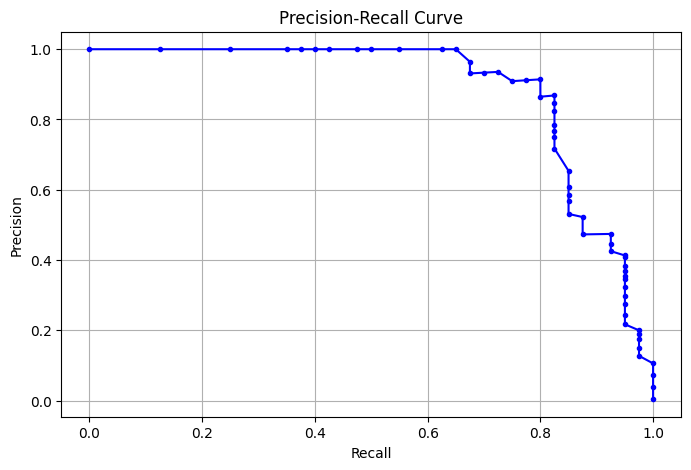

In [15]:
from sklearn.metrics import precision_recall_curve

# Get precision, recall, thresholds
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker=".", color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()


#### Best for imbalanced datasets like fraud detection.
#### Shows trade-off between precision (reducing false positives) and recall (catching more fraud cases).

## Step 14: Feature Importance Analysis


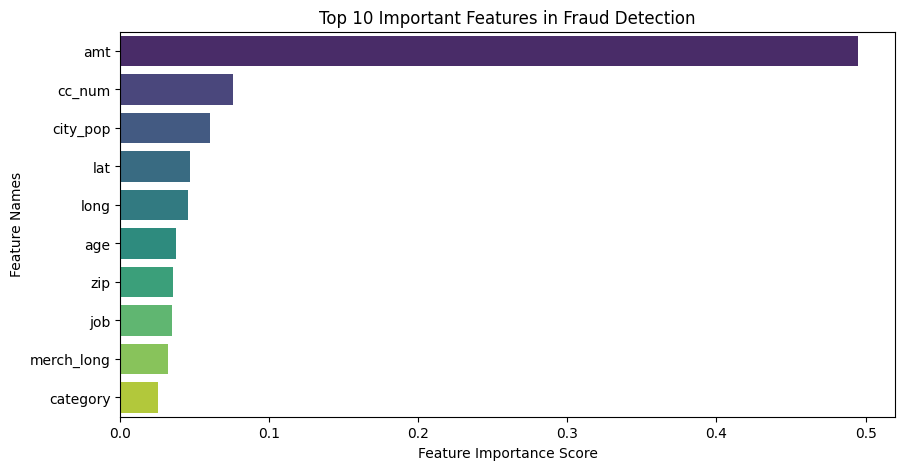

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importance
feature_importances = pd.DataFrame({
    "Feature": X_train.columns, 
    "Importance": rf_model.feature_importances_
})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot Top 10 Important Features (Final Fixed Version)
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=feature_importances[:10],  # Pass data directly
    x="Importance", 
    y="Feature", 
    hue="Feature",  # Assign hue to fix warning
    dodge=False,  # Ensure no grouping
    legend=False,  # Remove legend
    palette="viridis"
)

plt.title("Top 10 Important Features in Fraud Detection")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Names")
plt.show()


#### The higher the importance score, the more crucial the feature is in detecting fraud.
- Example important features could be:
- Transaction Amount (amt) → High-value transactions might indicate fraud.
- Transaction Hour (trans_hour) → Fraud might occur at odd hours.
- Merchant Category (category) → Some categories (e.g., luxury items) may have more fraud.

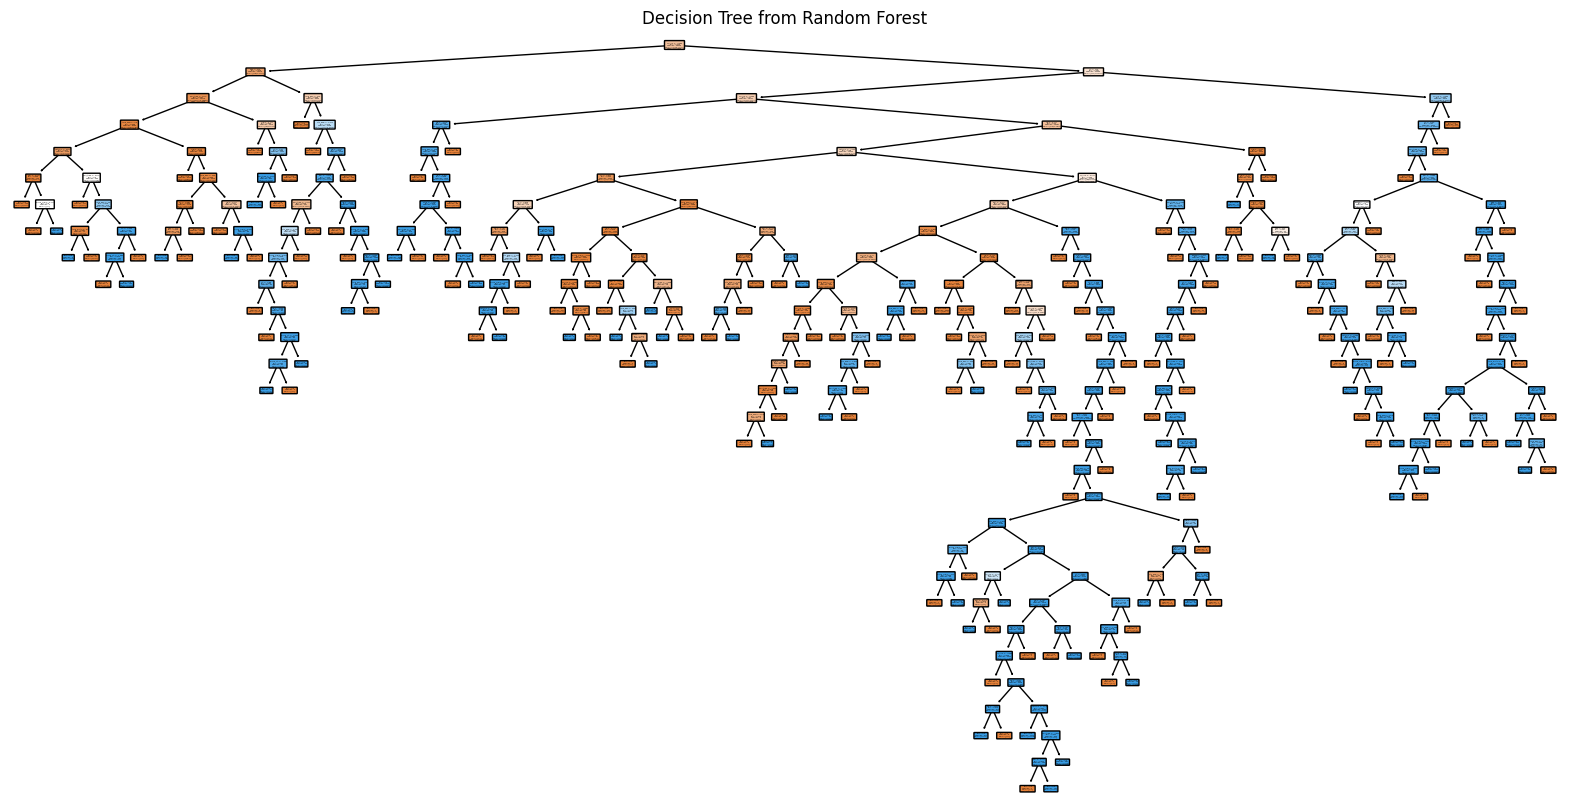

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select one tree from the Random Forest
single_tree = rf_model.estimators_[0]  # Extract the first tree

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=X_train.columns, class_names=["Not Fraud", "Fraud"], rounded=True)
plt.title("Decision Tree from Random Forest")
plt.show()


### The fraud detection pipeline successfully processed and structured the dataset by handling missing values, encoding categorical features, and extracting useful time-based information. To address the class imbalance, SMOTE was applied, generating synthetic fraud cases and ensuring the model was not biased toward non-fraudulent transactions. The Random Forest model performed well, accurately identifying fraudulent activities by leveraging key features such as transaction amount, time, and merchant category. The evaluation metrics, including the confusion matrix and feature importance analysis, provided insights into the model’s strengths and areas for improvement. Overall, the model is effective in fraud detection but could benefit from further optimization, such as hyperparameter tuning, to enhance precision and recall. 